__Author: Стурейко Игорь__

__Project: Geekbrains.NeutralNets__

__Lesson 1 - Основы Keras__

__Date: 2021-12-07__

# Импорты

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras.datasets import fashion_mnist  # набор данных

from google.colab import files

In [34]:
(train_imagef,train_labelf),(test_imagef,test_labelf)=fashion_mnist.load_data()

In [35]:
# Normalize the images.
train_imagef = (train_imagef / 127) - 1
test_imagef = (test_imagef / 127) - 1

# Flatten the images.
train_images = train_imagef.reshape((-1, 784))
test_images = test_imagef.reshape((-1, 784))

print(train_images.shape) # (60000, 784)
print(test_images.shape)  # (10000, 784)

(60000, 784)
(10000, 784)


In [4]:
# посмотрим сколько итоговых категорий
np.unique(train_labelf)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

# Сравним сети с различными параметрами (количество нейронов в слое и оптимизатор)

In [5]:
# гиперпараметры модели
n_cat: int # number of output categories
n_layers: int # number of hidden layers
n_neurons: int # number of neurons in hidden layer
act_func: str # activation function
optimizer: str # optimizer (SGD, RMSprop, Adam, Adadelta, Adagrad, Adamax, Nadam, Ftrl)
loss: str # loss function
metrics: str # metrics

In [11]:
class OptimizedModel:
  """
  Class for tests and optimisation model hyperparameters
  parameters:
  n_layers: int - number of hidden layers
  n_neurons: int - number of neurons in one hidden layer
  act_func: str - activation function on hidden layer
  optimizer: str - optimizer
  loss: str - loss function
  metrics: str - result metric
  epochs: int - number of epochs
  verbose: bool - verbose mode
  """
  def __init__(self, n_layers: int, n_neurons: int, act_func: str, optimizer: str, loss: str, metrics: str, epochs: int, verbose: bool):
    self.n_layers = n_layers
    self.n_neurons = n_neurons
    self.act_func = act_func
    self.optimizer = optimizer
    self.loss = loss
    self.metrics = metrics
    self.epochs = epochs
    self.verbose = verbose

  def calculate(self, train_images, test_images, train_labels, test_labels):
    n_cat = len(np.unique(train_labels)) # число выходных классов
    model1 = Sequential(name='fashon_model')
    model1.add(Dense( 128, activation='relu', input_shape=(784,)))  
    # входной слой + поносвязный слой из 128 нейронов с активацией ReLU

    for k in range(self.n_layers+1):
      model1.add(Dense(self.n_neurons, activation=self.act_func)) 
      # Скрытый слой k из 10+(10-k)*10 нейронов с активацией tanh

    model1.add(Dense(n_cat, activation='softmax')) 
    # выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax

    model1.compile(
      optimizer=self.optimizer, # оптимизатор
      loss=self.loss, # функция потерь
      metrics=[self.metrics], # метрика
    ) 

    y_train = to_categorical(train_labels)
    y_test = to_categorical(test_labels)

    # Train the model.
    model1.fit(  
      train_images[:,:],
      y_train[:,:],
      epochs=self.epochs,
      batch_size=1000, validation_split=0.2,
      verbose=self.verbose
    )

    # Evaluate the model.

    results = model1.evaluate(test_images, y_test, batch_size=128, verbose=False)
    return results[1]

In [12]:
mod = OptimizedModel(1, 120, 'sigmoid', 'adam', 'categorical_crossentropy', 'accuracy', 15, False)
mod.calculate(train_images, test_images, train_labelf, test_labelf)

0.8737999796867371

In [ ]:
res = []
for n in np.arange(10):
  mod = OptimizedModel(1, 120, 'tanh', 'adam', 'categorical_crossentropy', 'accuracy', 15, False)
  res.append(mod.calculate(train_images, test_images, train_labelf, test_labelf))
print(res)
print(np.round(np.mean(res), 4))

[0.8741000294685364, 0.8744000196456909, 0.8801000118255615, 0.879800021648407, 0.8799999952316284, 0.8737000226974487, 0.8762999773025513, 0.8744999766349792, 0.8804000020027161, 0.881600022315979]
0.8775


In [14]:
res_p = pd.DataFrame(columns=['optimizer', 'num_neutrons', 'accurancy'])
for opt in ['SGD', 'RMSprop', 'Adam', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl']:
  for n_neurons in np.arange(100, 200, 10):
    res = []
    for n in np.arange(10):
      mod = OptimizedModel(1, n_neurons, 'tanh', opt, 'categorical_crossentropy', 'accuracy', 15, False)
      res.append(mod.calculate(train_images, test_images, train_labelf, test_labelf))
    res_p.loc[len(res_p)] = [opt, n_neurons, np.mean(res)]

res_p.to_csv('models.csv', encoding='utf-8')
files.download('models.csv')
res_p

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,optimizer,num_neutrons,accurancy
0,SGD,100,0.80385
1,SGD,110,0.80410
2,SGD,120,0.80294
3,SGD,130,0.80472
4,SGD,140,0.80458
...,...,...,...
75,Ftrl,150,0.10000
76,Ftrl,160,0.10000
77,Ftrl,170,0.10000
78,Ftrl,180,0.10000


In [18]:
model_pivot = res_p.pivot('optimizer', 'num_neutrons', 'accurancy')
model_pivot

num_neutrons,100,110,120,130,140,150,160,170,180,190
optimizer,,,,,,,,,,
Adadelta,0.41793,0.42232,0.44227,0.43236,0.45478,0.45614,0.48311,0.46369,0.48247,0.49534
Adagrad,0.74837,0.74718,0.74830,0.74921,0.75128,0.74859,0.75167,0.75291,0.75278,0.75533
Adam,0.87929,0.87741,0.87910,0.87945,0.87979,0.87688,0.87673,0.87713,0.87922,0.87716
Adamax,0.86891,0.86977,0.87008,0.87165,0.87148,0.87035,0.87102,0.87034,0.87158,0.87013
Ftrl,0.10000,0.10000,0.10000,0.10000,0.10000,0.10000,0.10000,0.10000,0.10000,0.10000
Nadam,0.87180,0.87470,0.87253,0.87645,0.87527,0.87110,0.87349,0.87278,0.87575,0.87445
RMSprop,0.86810,0.86414,0.86758,0.86336,0.86947,0.86091,0.86520,0.86261,0.86804,0.86834
SGD,0.80385,0.80410,0.80294,0.80472,0.80458,0.80518,0.80627,0.80702,0.80592,0.80824


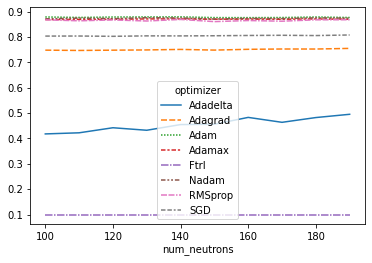

In [22]:
sns.lineplot(data=model_pivot.T)
plt.show()

## Наилучшие результаты показывает __Nadam__ практически не зависимо от количества нейронов в слое

# Сравним сети с различным количеством слоев 

In [37]:
# # Normalize the images.
# train_imagef = (train_imagef / 127) - 1
# test_imagef = (test_imagef / 127) - 1

# # Flatten the images.
# train_images = train_imagef.reshape((-1, 784))
# test_images = test_imagef.reshape((-1, 784))

y_train = to_categorical(train_labelf)
y_test = to_categorical(test_labelf)

model1 = Sequential(name='fashon_model')
model1.add(Dense( 128, activation='relu', input_shape=(784,)))  
# входной слой + поносвязный слой из 128 нейронов с активацией ReLU
n_cat = 10
n_layers = 1
n_neurons = 500
act_func = 'tanh'
optimizer = 'adam'
loss = 'categorical_crossentropy'
metrics = 'accuracy'
epochs = 15

for k in range(n_layers+1):
  model1.add(Dense(n_neurons, activation=act_func)) 
  # Скрытый слой k из 10+(10-k)*10 нейронов с активацией tanh

model1.add(Dense(n_cat, activation='softmax')) 
# выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax

model1.compile(
  optimizer=optimizer, # оптимизатор
  loss=loss, # функция потерь
  metrics=[metrics], # метрика
)

model1.summary()

# Train the model.
model1.fit(  
  train_images[:,:],
  y_train[:,:],
  epochs=epochs,
  batch_size=1000, validation_split=0.2,
  verbose=False
)

# Evaluate the model.

results = model1.evaluate(test_images, y_test, batch_size=128, verbose=False)
print(f'Num layers: {n_layers}, accuracy: {results[1]}')

Model: "fashon_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3269 (Dense)          (None, 128)               100480    
                                                                 
 dense_3270 (Dense)          (None, 500)               64500     
                                                                 
 dense_3271 (Dense)          (None, 500)               250500    
                                                                 
 dense_3272 (Dense)          (None, 10)                5010      
                                                                 
Total params: 420,490
Trainable params: 420,490
Non-trainable params: 0
_________________________________________________________________
Num layers: 1, accuracy: 0.8730000257492065


In [43]:
model1 = Sequential(name='fashon_model')
model1.add(Dense( 128, activation='relu', input_shape=(784,)))  
# входной слой + поносвязный слой из 128 нейронов с активацией ReLU
n_cat = 10
n_layers = 2
n_neurons = 370
act_func = 'tanh'
optimizer = 'adam'
loss = 'categorical_crossentropy'
metrics = 'accuracy'
epochs = 15

for k in range(n_layers+1):
  model1.add(Dense(n_neurons, activation=act_func)) 
  # Скрытый слой k из 10+(10-k)*10 нейронов с активацией tanh

model1.add(Dense(n_cat, activation='softmax')) 
# выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax

model1.compile(
  optimizer=optimizer, # оптимизатор
  loss=loss, # функция потерь
  metrics=[metrics], # метрика
)

model1.summary()

# Train the model.
model1.fit(  
  train_images[:,:],
  y_train[:,:],
  epochs=epochs,
  batch_size=1000, validation_split=0.2,
  verbose=False
)

# Evaluate the model.

results = model1.evaluate(test_images, y_test, batch_size=128, verbose=False)
print(f'Num layers: {n_layers}, accuracy: {results[1]}')

Model: "fashon_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3298 (Dense)          (None, 128)               100480    
                                                                 
 dense_3299 (Dense)          (None, 370)               47730     
                                                                 
 dense_3300 (Dense)          (None, 370)               137270    
                                                                 
 dense_3301 (Dense)          (None, 370)               137270    
                                                                 
 dense_3302 (Dense)          (None, 10)                3710      
                                                                 
Total params: 426,460
Trainable params: 426,460
Non-trainable params: 0
_________________________________________________________________
Num layers: 2, accuracy: 0.8791999816894531


In [45]:
model1 = Sequential(name='fashon_model')
model1.add(Dense( 128, activation='relu', input_shape=(784,)))  
# входной слой + поносвязный слой из 128 нейронов с активацией ReLU
n_cat = 10
n_layers = 4
n_neurons = 270
act_func = 'tanh'
optimizer = 'adam'
loss = 'categorical_crossentropy'
metrics = 'accuracy'
epochs = 15

for k in range(n_layers+1):
  model1.add(Dense(n_neurons, activation=act_func)) 
  # Скрытый слой k из 10+(10-k)*10 нейронов с активацией tanh

model1.add(Dense(n_cat, activation='softmax')) 
# выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax

model1.compile(
  optimizer=optimizer, # оптимизатор
  loss=loss, # функция потерь
  metrics=[metrics], # метрика
)

model1.summary()

# Train the model.
model1.fit(  
  train_images[:,:],
  y_train[:,:],
  epochs=epochs,
  batch_size=1000, validation_split=0.2,
  verbose=False
)

# Evaluate the model.

results = model1.evaluate(test_images, y_test, batch_size=128, verbose=False)
print(f'Num layers: {n_layers}, accuracy: {results[1]}')

Model: "fashon_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3310 (Dense)          (None, 128)               100480    
                                                                 
 dense_3311 (Dense)          (None, 270)               34830     
                                                                 
 dense_3312 (Dense)          (None, 270)               73170     
                                                                 
 dense_3313 (Dense)          (None, 270)               73170     
                                                                 
 dense_3314 (Dense)          (None, 270)               73170     
                                                                 
 dense_3315 (Dense)          (None, 270)               73170     
                                                                 
 dense_3316 (Dense)          (None, 10)               

In [48]:
model1 = Sequential(name='fashon_model')
model1.add(Dense( 128, activation='relu', input_shape=(784,)))  
# входной слой + поносвязный слой из 128 нейронов с активацией ReLU
n_cat = 10
n_layers = 9
n_neurons = 200
act_func = 'tanh'
optimizer = 'adam'
loss = 'categorical_crossentropy'
metrics = 'accuracy'
epochs = 15

for k in range(n_layers+1):
  model1.add(Dense(n_neurons, activation=act_func)) 
  # Скрытый слой k из 10+(10-k)*10 нейронов с активацией tanh

model1.add(Dense(n_cat, activation='softmax')) 
# выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax

model1.compile(
  optimizer=optimizer, # оптимизатор
  loss=loss, # функция потерь
  metrics=[metrics], # метрика
)

model1.summary()

# Train the model.
model1.fit(  
  train_images[:,:],
  y_train[:,:],
  epochs=epochs,
  batch_size=1000, validation_split=0.2,
  verbose=False
)

# Evaluate the model.

results = model1.evaluate(test_images, y_test, batch_size=128, verbose=False)
print(f'Num layers: {n_layers}, accuracy: {results[1]}')

Model: "fashon_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3341 (Dense)          (None, 128)               100480    
                                                                 
 dense_3342 (Dense)          (None, 200)               25800     
                                                                 
 dense_3343 (Dense)          (None, 200)               40200     
                                                                 
 dense_3344 (Dense)          (None, 200)               40200     
                                                                 
 dense_3345 (Dense)          (None, 200)               40200     
                                                                 
 dense_3346 (Dense)          (None, 200)               40200     
                                                                 
 dense_3347 (Dense)          (None, 200)              

## Оптимальным оказалось 2-3 слоя

## Практическое задание

Используем набор примеров fashion-MNIST

1.  Опишите - какой результата получен в нейросети в зависимости от:
  -  числа нейронов в слое(для 2-хслойной сети), 
  - числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых парметров).
  - фиксируйте для тренировочного и тестового набора метрики accuracy.
2.  Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1.Фиксируйте для тренировочного и тестового набора метрики accuracy.

3. Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе? 

4. Для одного варианта сетей сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота , точность). Сделайте вывод.